In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('placement.csv')

In [3]:
data.head

<bound method NDFrame.head of      cgpa  placed
0    7.19       1
1    7.46       1
2    7.54       1
3    6.42       1
4    7.23       0
..    ...     ...
995  8.87       1
996  9.12       1
997  4.89       0
998  8.62       1
999  4.90       1

[1000 rows x 2 columns]>

In [4]:
data.shape

(1000, 2)

In [5]:
data.isnull().sum()

cgpa      0
placed    0
dtype: int64

In [6]:
x=data['cgpa']
y=data['placed']

<AxesSubplot:xlabel='cgpa', ylabel='placed'>

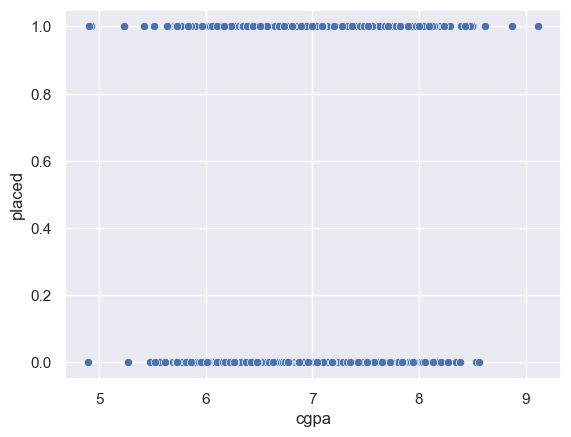

In [7]:
sns.set_theme()
sns.scatterplot(data=data,x=data['cgpa'],y=data['placed'])

In [8]:

x = data.iloc[:,:1]
y = data.iloc[:,1:]

In [9]:
y

,placed
0,1
1,1
2,1
3,1
4,0
...,...
995,1
996,1
997,0
998,1


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=40)

In [38]:
x_train.shape,x_test.shape

((900, 1), (100, 1))

In [39]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
model = LR.fit(x_train,y_train)

C:\Users\darsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
y_pred = LR.predict(x_test)

In [41]:
LR.score(x_test,y_test)*100

56.00000000000001

In [42]:
print(y_pred)

[0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1]


In [43]:
!pip install gradio

In [44]:
import gradio as gr

In [45]:
def predict_placement(cgpa):
    prediction = rf.predict([[cgpa]])[0]
    if prediction == 0:
        return "Not Placed"
    else:
        return "Placed"

iface = gr.Interface(
    fn=predict_placement, 
    inputs=gr.inputs.Slider(minimum=0, maximum=10, default=8, label="CGPA"), 
    outputs="text",
    title="Student Placement Prediction"
)


C:\Users\darsh\anaconda3\lib\site-packages\gradio\inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\darsh\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [46]:
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
